In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import scipy, matplotlib

from scipy.fftpack import fft, ifft

In [49]:
data = pd.read_csv("E:\\Mine\\Kuliah\\OneDrive - Institut Teknologi Sepuluh Nopember\\SMT 8\\TA\\Ambil Data\\Tama\\tama tengkurap1.csv",names=['ecg'])
##names=['ecg'])
fs = 125

## Plot ECG

In [50]:
data

,ecg
0,0.000000
1,0.000000
2,0.004835
3,0.049158
4,0.000000
...,...
8959,0.438388
8960,0.496410
8961,0.499634
8962,0.461758


In [51]:
#out = np.array(data["ecg"])
# np.set_printoptions(threshold=np.inf)
#out
# data["'V4'"][:1250].to_csv(' data1250.txt', sep = ',' , index=False)

In [52]:
sinyal = np.array(data["ecg"])
time = np.arange(len(sinyal[2000:3000]))/fs
ndata = len(sinyal)

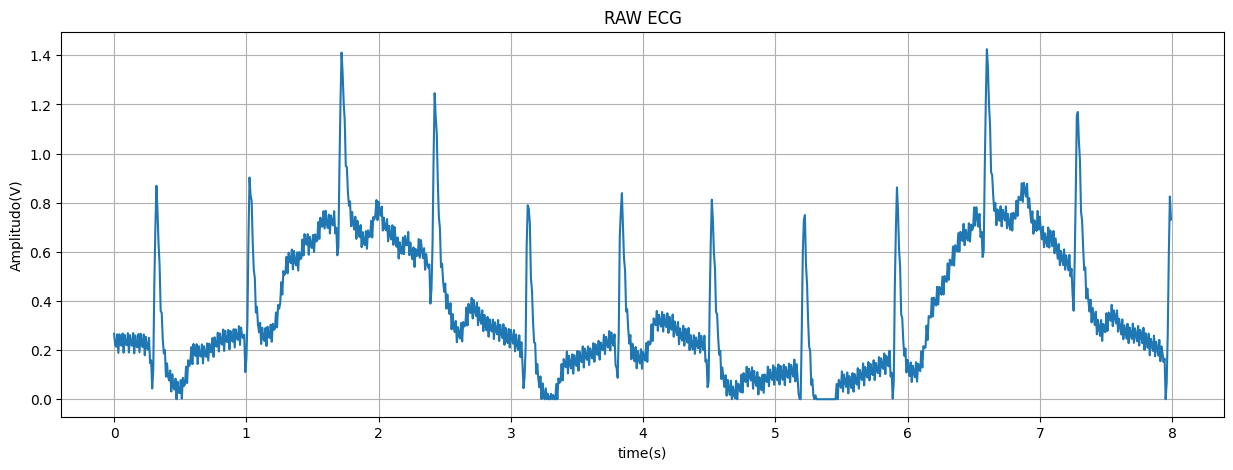

In [53]:
plt.figure(figsize = (15,5))
plt.plot(time, sinyal[2300:3300])

plt.title('RAW ECG')
plt.xlabel('time(s)') 
plt.ylabel('Amplitudo(V)')
plt.grid()

## LPF

In [ ]:
lpf_ecg = np.zeros(ndata)
fc_lpf = 30
fc_lpf = float(fc_lpf)
for n in range (3):
    lpf_ecg[-n] = lpf_ecg[0]
    sinyal[-n] = sinyal[0]


T = 1/125
w = 2*math.pi*fc_lpf
a0 = w**2
a1 = 2*(w**2)
b1 = ((8/(T**2))-(2*(w**2)))
c0 = ((4/(T**2))-((2*(math.sqrt(2))*w)/T)+(w**2))
c1 = ((4/(T**2))+((2*(math.sqrt(2))*w)/T)+(w**2))

for n in range (ndata):
    lpf_ecg[n] = ((b1*lpf_ecg[n-1])-(c0*lpf_ecg[n-2])+(a0*sinyal[n])+(a1*sinyal[n-1])+(a0*sinyal[n-2]))/c1
(lpf_ecg)*2

In [ ]:
plt.figure(figsize = (15,5))
plt.plot(time, lpf_ecg[2000:3000])
plt.title('Hasil LPF')
plt.xlabel('time(s)') 
plt.ylabel('Amplitudo(V)')
plt.grid()

In [ ]:
fc_hpf = 2
fc_hpf = float(fc_hpf)
hpf_ecg = np.zeros(np.size(lpf_ecg))
for n in range (np.size(lpf_ecg)):
    hpf_ecg[-n] = hpf_ecg[0]


T = 1/fs
w = 2*math.pi*fc_hpf
e0 = 4*T
e1 = 8*T
e2 = 4*T
d0 = ((2*(w**2)*(T**2))-8)
d1 = (((w**2)*(T**2))-(2*(math.sqrt(2))*T*w)+4)
d2 = ((w**2)*(T**2))+(2*(math.sqrt(2))*T*w)+4

for n in range (np.size(lpf_ecg)):
    hpf_ecg[n] = ((e0*lpf_ecg[n])-(e1*lpf_ecg[n-1])+(e2*lpf_ecg[n-2])-(d0*hpf_ecg[n-1])-(d1*hpf_ecg[n-2]))/d2
hpf_ecg

## HPF

In [ ]:
plt.figure(figsize = (15,5))
plt.plot(time, hpf_ecg[2000:3000])
plt.title('Hasil LPF')
plt.xlabel('time(s)') 
plt.ylabel('Amplitudo(V)')
plt.grid()

## DWT

In [54]:
def dirac(x):
    if x == 0:
        diracdelta = 1
    else:
        diracdelta = 0
    return diracdelta

In [55]:
j = 1
k = np.arange(-(round((2**j))+round((2**(j-1))-2)), -(-round((2**(j-1)))))
qj1 = np.zeros((k.size))
print(k)
for index, i in enumerate(k):
    qj1[index] = -2*(dirac(i)-dirac(i+1))
print(qj1)

[-1  0]
[ 2. -2.]


In [56]:
qj1[1]

-2.0

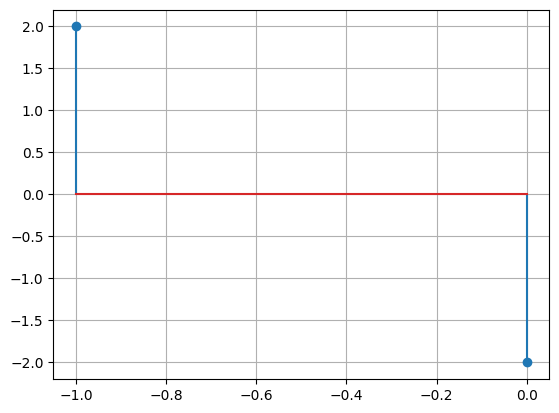

In [57]:
plt.stem(k, qj1)
plt.grid()

In [58]:
j = 2 
k = np.arange(-(round((2**j))+round((2**(j-1))-2)), -(-round((2**(j-1)))))
qj2 = np.zeros((k.size))
print(k)
for index, i in enumerate(k):
      qj2[index] = -1/4*(dirac(i-1) + 3*dirac(i) + 2*dirac(i+1) - 2*dirac(i+2)
                      - 3*dirac(i+3) - dirac(i+4))
print(qj2)

[-4 -3 -2 -1  0  1]
[ 0.25  0.75  0.5  -0.5  -0.75 -0.25]


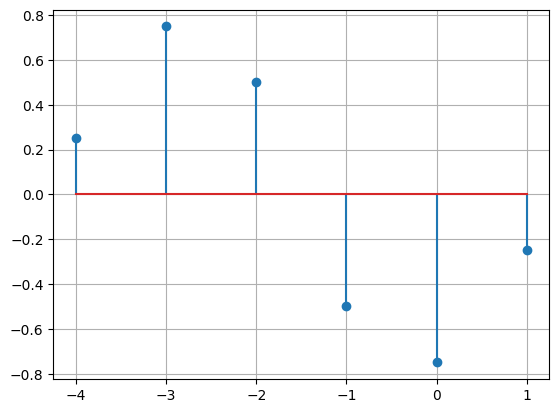

In [59]:
plt.stem(k, qj2)
plt.grid()

In [60]:
j = 3
k = np.arange(-(round((2**j))+round((2**(j-1))-2)), -(-round((2**(j-1)))))
qj3 = np.zeros((k.size))
print(k)
for index, i in enumerate (k) :
    qj3[index] = -1/32*(dirac(i-3) + 3*dirac(i-2) + 6*dirac(i-1) + 10*dirac(i) + 11*dirac(i+1)
                       + 9*dirac(i+2) + 4*dirac(i+3) - 4*dirac(i+4) - 9*dirac(i+5) - 11*dirac(i+6)
                       - 10*dirac(i+7) - 6*dirac(i+8) - 3*dirac(i+9) - dirac(i+10))
print(qj3)

[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3]
[ 0.03125  0.09375  0.1875   0.3125   0.34375  0.28125  0.125   -0.125
 -0.28125 -0.34375 -0.3125  -0.1875  -0.09375 -0.03125]


In [61]:
j = 4
k = np.arange(-(round((2**j))+round((2**(j-1))-2)), -(-round((2**(j-1)))))
qj4 = np.zeros((k.size))
print(k)
for index, i in enumerate (k) :
    qj4[index] = -1/256*(dirac(i-7) + 3*dirac(i-6) + 6*dirac(i-5) + 10*dirac(i-4) + 15*dirac(i-3)
                        + 21*dirac(i-2) + 28*dirac(i-1) + 36*dirac(i) + 41*dirac(i+1) + 43*dirac(i+2)
                        + 42*dirac(i+3) + 38*dirac(i+4) + 31*dirac(i+5) + 21*dirac(i+6) + 8*dirac(i+7)
                        - 8*dirac(i+8) - 21*dirac(i+9) - 31*dirac(i+10) - 38*dirac(i+11) - 42*dirac(i+12)
                        - 43*dirac(i+13) - 41*dirac(i+14) - 36*dirac(i+15) - 28*dirac(i+16) - 21*dirac(i+17)
                        - 15*dirac(i+18) - 10*dirac(i+19) - 6*dirac(i+20) - 3*dirac(i+21) - dirac(i+22))
print(qj4)

[-22 -21 -20 -19 -18 -17 -16 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5
  -4  -3  -2  -1   0   1   2   3   4   5   6   7]
[ 0.00390625  0.01171875  0.0234375   0.0390625   0.05859375  0.08203125
  0.109375    0.140625    0.16015625  0.16796875  0.1640625   0.1484375
  0.12109375  0.08203125  0.03125    -0.03125    -0.08203125 -0.12109375
 -0.1484375  -0.1640625  -0.16796875 -0.16015625 -0.140625   -0.109375
 -0.08203125 -0.05859375 -0.0390625  -0.0234375  -0.01171875 -0.00390625]


In [62]:
j = 5
k = np.arange(-(round((2**j))+round((2**(j-1))-2)), -(-round((2**(j-1)))))
qj5 = np.zeros((k.size))
print(k)
for index, i in enumerate (k) :
    qj5[index] = -1/(512)*(dirac(i-15) + 3*dirac(i-14) + 6*dirac(i-13) + 10*dirac(i-12) + 15*dirac(i-11) + 21*dirac(i-10)
                        + 28*dirac(i-9) + 36*dirac(i-8) + 45*dirac(i-7) + 55*dirac(i-6) + 66*dirac(i-5) + 78*dirac(i-4)
                        + 91*dirac(i-3) + 105*dirac(i-2) + 120*dirac(i-1) + 136*dirac(i) + 149*dirac(i+1) + 159*dirac(i+2)
                        + 166*dirac(i+3) + 170*dirac(i+4) + 171*dirac(i+5) + 169*dirac(i+6) + 164*dirac(i+7) + 156*dirac(i+8)
                        + 145*dirac(i+9) + 131*dirac(i+10) + 114*dirac(i+11) + 94*dirac(i+12) + 71*dirac(i+13) + 45*dirac(i+14)
                        + 16*dirac(i+15) - 16*dirac(i+16) - 45*dirac(i+17) - 71*dirac(i+18) - 94*dirac(i+19) - 114*dirac(i+20)
                        - 131*dirac(i+21) - 145*dirac(i+22) - 156*dirac(i+23) - 164*dirac(i+24) - 169*dirac(i+25)
                        - 171*dirac(i+26) - 170*dirac(i+27) - 166*dirac(i+28) - 159*dirac(i+29) - 149*dirac(i+30)
                        - 136*dirac(i+31) - 120*dirac(i+32) - 105*dirac(i+33) - 91*dirac(i+34) - 78*dirac(i+35)
                        - 66*dirac(i+36) - 55*dirac(i+37) - 45*dirac(i+38) - 36*dirac(i+39) - 28*dirac(i+40)
                        - 21*dirac(i+41) - 15*dirac(i+42) - 10*dirac(i+43) - 6*dirac(i+44) - 3*dirac(i+45)
                        - dirac(i+46))
print(qj5)

[-46 -45 -44 -43 -42 -41 -40 -39 -38 -37 -36 -35 -34 -33 -32 -31 -30 -29
 -28 -27 -26 -25 -24 -23 -22 -21 -20 -19 -18 -17 -16 -15 -14 -13 -12 -11
 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10  11  12  13  14  15]
[ 0.00195312  0.00585938  0.01171875  0.01953125  0.02929688  0.04101562
  0.0546875   0.0703125   0.08789062  0.10742188  0.12890625  0.15234375
  0.17773438  0.20507812  0.234375    0.265625    0.29101562  0.31054688
  0.32421875  0.33203125  0.33398438  0.33007812  0.3203125   0.3046875
  0.28320312  0.25585938  0.22265625  0.18359375  0.13867188  0.08789062
  0.03125    -0.03125    -0.08789062 -0.13867188 -0.18359375 -0.22265625
 -0.25585938 -0.28320312 -0.3046875  -0.3203125  -0.33007812 -0.33398438
 -0.33203125 -0.32421875 -0.31054688 -0.29101562 -0.265625   -0.234375
 -0.20507812 -0.17773438 -0.15234375 -0.12890625 -0.10742188 -0.08789062
 -0.0703125  -0.0546875  -0.04101562 -0.02929688 -0.01953125 -0.01171875
 -0.00585938 -0.0019

In [63]:
g = [0] * 5
h = [0] * 5
Hw = [0] * 1000
Gw = [0] * 1000
fs = 250
for n in range (-2, 2):
    h[n] = 1/8*(dirac(n-1)+3*dirac(n)+3*dirac(n+1)+3*dirac(n+2))
    g[n] = -2*(dirac(n)-dirac(n+1))

for i in range (fs):
    reH = 0
    imH = 0
    reG = 0
    imG = 0
    for k in range (-1, 3):
        reG = reG + g[k]*np.cos(k*2*np.pi*i/fs)
        imG = imG - g[k]*np.sin(k*2*np.pi*i/fs)
        reH = reH + h[k]*np.cos(k*2*np.pi*i/fs)
        imH = imH - h[k]*np.sin(k*2*np.pi*i/fs)
    Hw[i] = np.sqrt((reH**2)+(imH**2));
    Gw[i] = np.sqrt((reG**2)+(imG**2));
xx = []
x = int(fs/2)
Q = np.zeros((9,x))
for i in range (x):
    xx.append(i)
    Q[1,i] = Gw[i]
    Q[2,i] = Gw[2*i]*Hw[i]
    Q[3,i] = Gw[4*i]*Hw[2*i]*Hw[i]
#     Q[4,i] = Gw[8*i]*Hw[4*i]*Hw[2*i]*Hw[i]
#     Q[5,i] = Gw[16*i]*Hw[8*i]*Hw[4*i]*Hw[2*i]*Hw[i]
#     Q[6,i] = Gw[32*i]*Hw[16*i]*Hw[8*i]*Hw[4*i]*Hw[2*i]*Hw[i]
#     Q[7,i] = Gw[64*i]*Gw[32*i]*Gw[16*i]*Hw[8*i]*Hw[4*i]*Hw[2*i]*Hw[i]
#     Q[8,i] = Gw[128*i]*Gw[64*i]*Gw[32*i]*Gw[16*i]*Hw[8*i]*Hw[4*i]*Hw[2*i]*Hw[i]


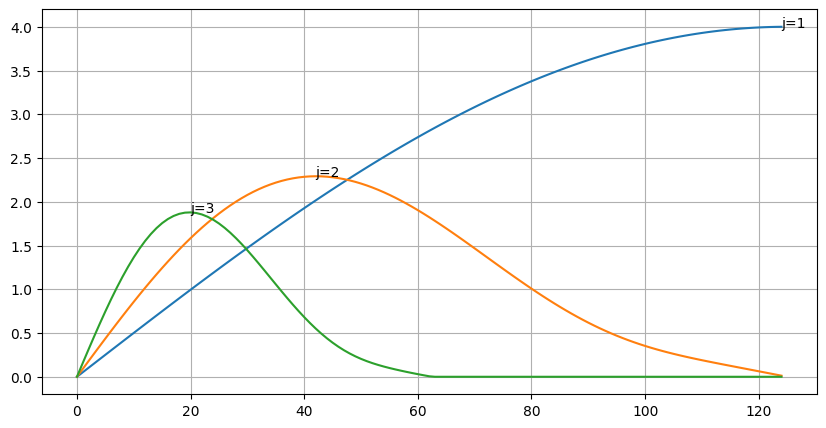

In [64]:
plt.figure(figsize = (10,5))
# plt.plot(xx, Q[1], xx, Q[2], xx, Q[3], xx, Q[4], xx, Q[5], xx, Q[6], xx, Q[7], xx, Q[8])
plt.plot(xx, Q[1], xx, Q[2], xx, Q[3])
plt.title('')
plt.grid()

# text = ['j=1', 'j=2', 'j=3', 'j=4', 'j=5', 'j=6', 'j=7', 'j=8']
text = ['j=1', 'j=2', 'j=3']
for i in range(3):
    plt.text(xx[Q[i + 1].argmax()], np.max(Q[i + 1]), text[i])


In [65]:
def delay(j):
    T = round((2**(j-1))) - 1
    return T

In [66]:
w2fb1 = np.zeros(ndata + delay(1))
w2fb2 = np.zeros(ndata + delay(2))
w2fb3 = np.zeros(ndata + delay(3))
w2fb4 = np.zeros(ndata + delay(4))
w2fb5 = np.zeros(ndata + delay(5))

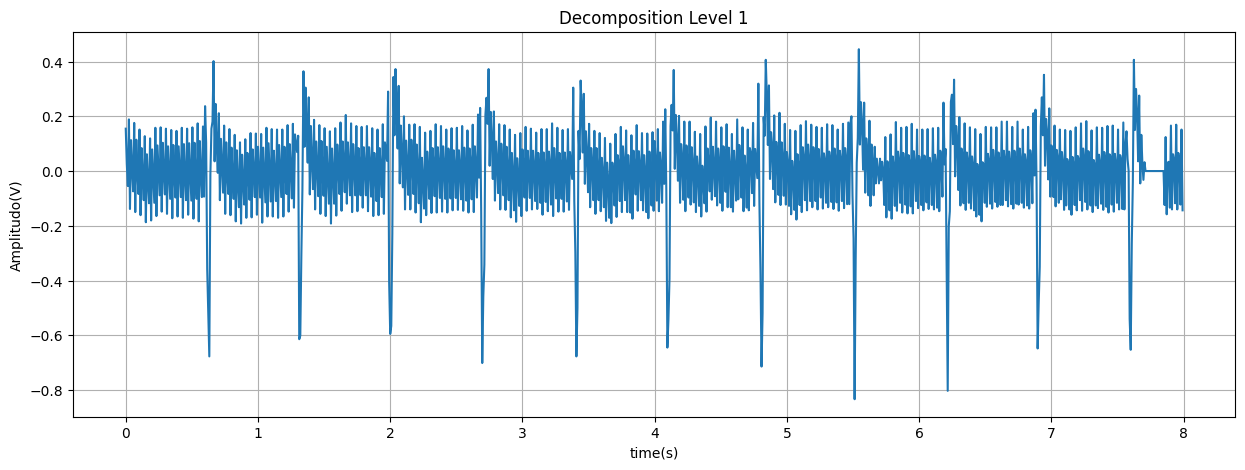

In [67]:
for n in range(ndata - 1):
    w2fb1[n] = 0
    j = 1
    k_temp = np.arange(-(round(2**(j))+round(2**(j-1))-2), -(-round(2**(j-1))))
    for x in (k_temp):
        w2fb1[n-delay(1)] += qj1[x] * sinyal[min(ndata - 1, n - x)]
        
plt.figure(figsize = (15,5))
plt.plot(time, w2fb1[2000:3000])
plt.title('Decomposition Level 1')
plt.xlabel('time(s)') 
plt.ylabel('Amplitudo(V)')
plt.grid()

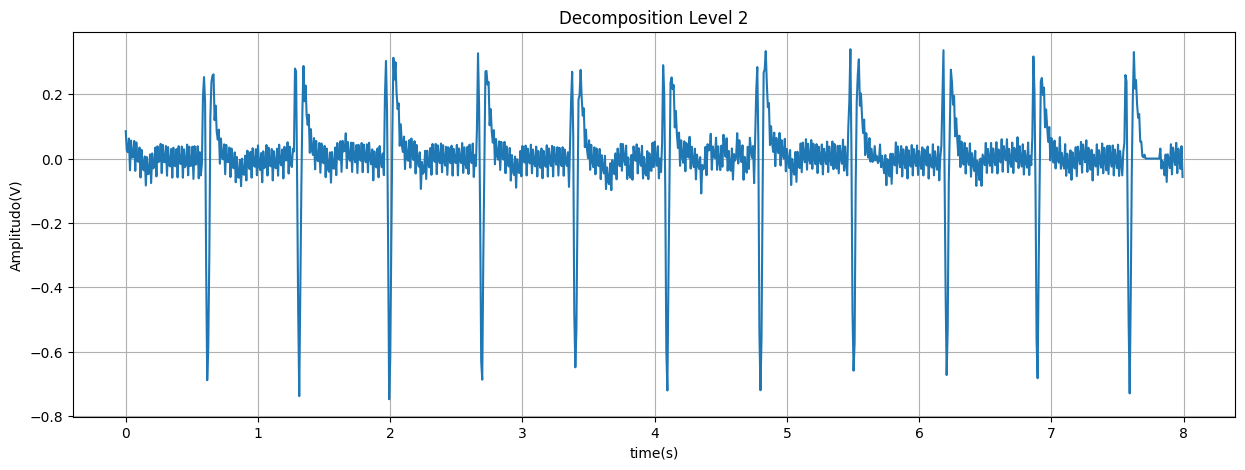

In [68]:
for n in range(ndata - 1):
    w2fb2[n] = 0
    j = 2
    k_temp = np.arange(-(round(2**(j))+round(2**(j-1))-2), -(-round(2**(j-1))))
    for x in (k_temp):
        w2fb2[n-delay(2)] += qj2[x] * sinyal[min(ndata - 1, n - x)]
        
plt.figure(figsize = (15,5))
plt.plot(time, w2fb2[2000:3000])
plt.title('Decomposition Level 2')
plt.xlabel('time(s)') 
plt.ylabel('Amplitudo(V)')
plt.grid()

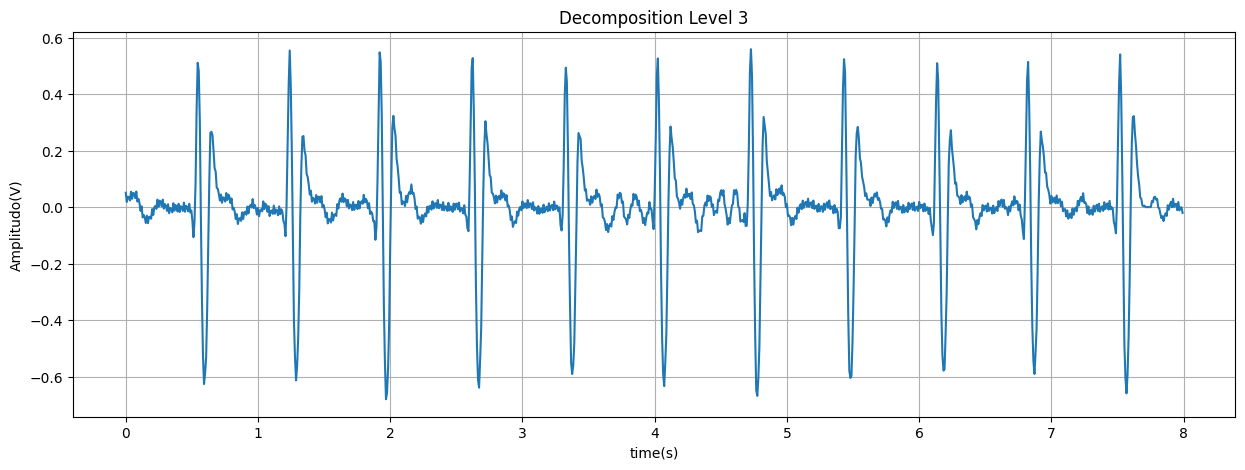

In [69]:
for n in range(ndata - 1):
    w2fb3[n] = 0
    j = 3
    k_temp = np.arange(-(round(2**(j))+round(2**(j-1))-2), -(-round(2**(j-1))))
    for x in (k_temp):
        w2fb3[n-delay(3)] += qj3[x] * sinyal[min(ndata - 1, n - x)]
        
plt.figure(figsize = (15,5))
plt.plot(time, w2fb3[2000:3000])
plt.title('Decomposition Level 3')
plt.xlabel('time(s)') 
plt.ylabel('Amplitudo(V)')
plt.grid()

In [70]:
gradien1 = np.zeros(ndata)
gradien2 = np.zeros(ndata)
gradien3 = np.zeros(ndata)
gradien4 = np.zeros(ndata)
gradien5 = np.zeros(ndata)
hasil1 = np.zeros(ndata)
hasil2 = np.zeros(ndata)
hasil3 = np.zeros(ndata)
hasil4 = np.zeros(ndata)
hasil5 = np.zeros(ndata)

In [71]:
for n  in range(ndata-3):
    gradien1[n] = w2fb1[n] - w2fb1[n-3]
    gradien2[n] = w2fb2[n] - w2fb2[n-3]
    gradien3[n] = w2fb3[n] - w2fb3[n-3]

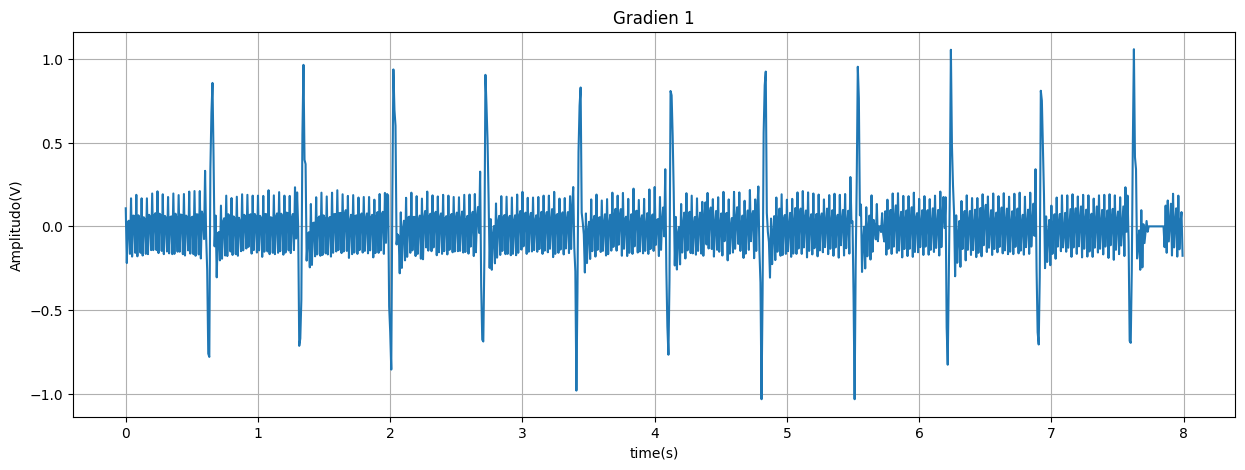

In [72]:
plt.figure(figsize = (15,5))
plt.plot(time, gradien1[2000:3000])
#plt.plot(time[:500], gradien2[0:500])
#plt.plot(time[:500], gradien3[0:500])
plt.title('Gradien 1')
plt.xlabel('time(s)') 
plt.ylabel('Amplitudo(V)')
plt.grid()

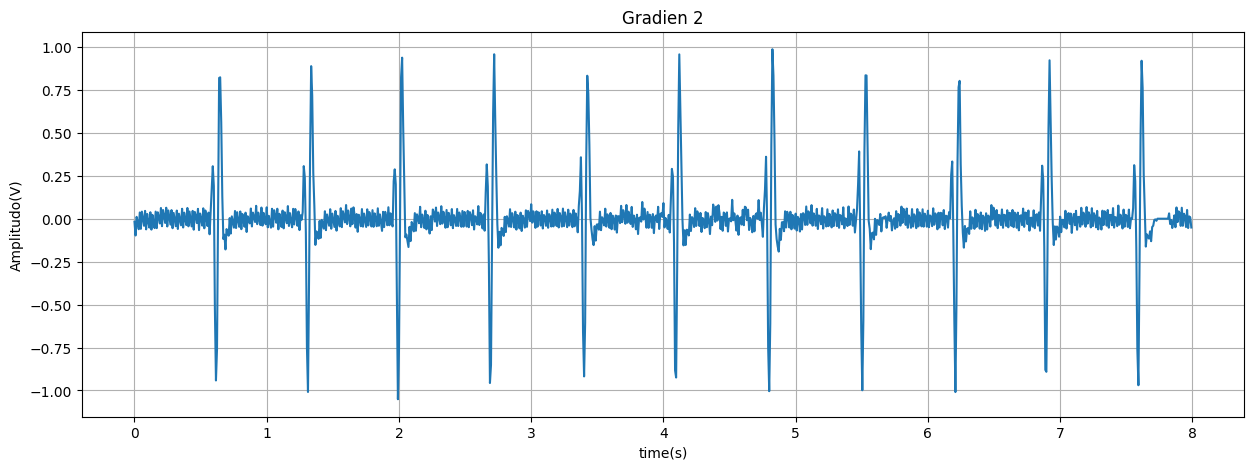

In [73]:
plt.figure(figsize = (15,5))
plt.plot(time, gradien2[2000:3000])
plt.title('Gradien 2')
plt.xlabel('time(s)') 
plt.ylabel('Amplitudo(V)')
plt.grid()

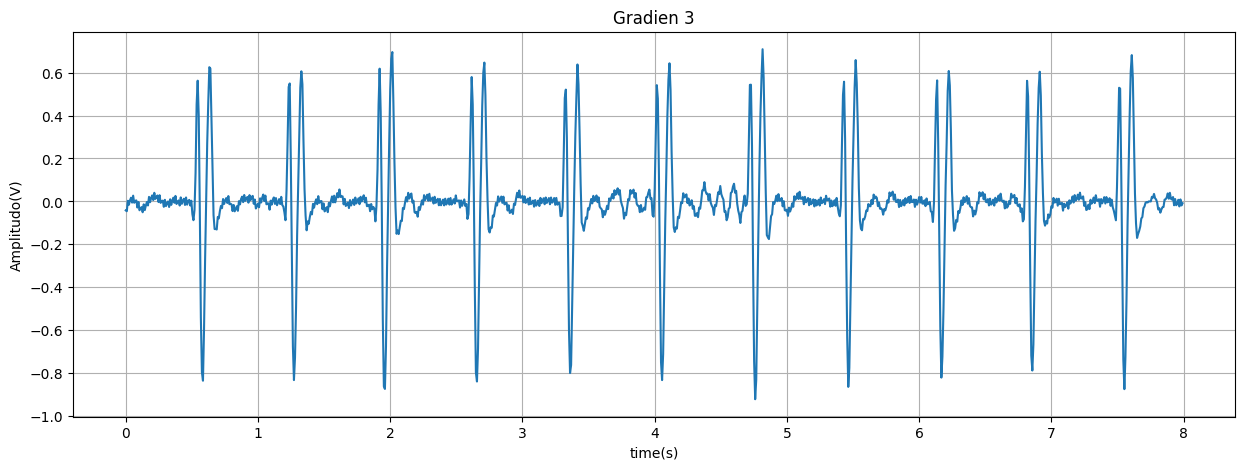

In [74]:
plt.figure(figsize = (15,5))
plt.plot(time, gradien3[2000:3000])
plt.title('Gradien 3')
plt.xlabel('time(s)') 
plt.ylabel('Amplitudo(V)')
plt.grid()

In [77]:
hasil_QRS = np.zeros(ndata)

In [78]:
for i in range(ndata):
    if (gradien1[i] > 0.5 and gradien2[i] > 0.5 and gradien3[i] > 0.2):
        hasil_QRS[i] = 1
    else:
        hasil_QRS[i] = 0

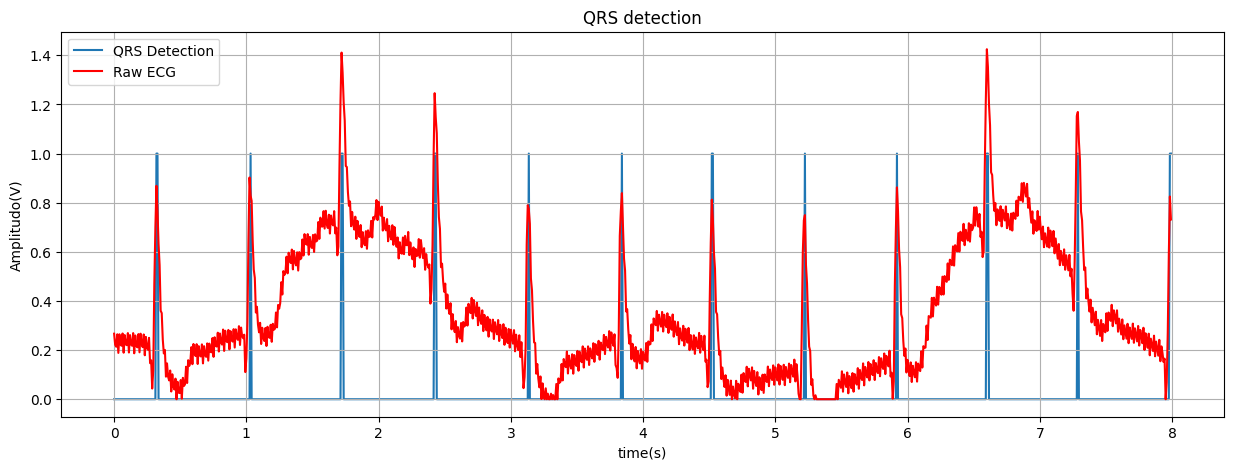

In [79]:
plt.figure(figsize = (15,5))
plt.plot(time, hasil_QRS[2300:3300],label='QRS Detection', zorder=1)
plt.plot(time,sinyal[2300:3300],color='red', label='Raw ECG', zorder=2)
plt.title('QRS detection')
plt.xlabel('time(s)') 
plt.ylabel('Amplitudo(V)')
plt.legend(loc="upper left")
plt.grid()

## RMSSD

In [ ]:
k = []
for n in range(ndata-1):
    if hasil_QRS[n] == 0 and hasil_QRS[n+1] == 1:
        k.append(n)

rrinterval = np.zeros(len(k))
bpm = np.zeros(len(k))
for i in range(1, len(k)-1):
    rrinterval[i] = ((k[i]/fs)-(k[i-1]/fs))
    bpm[i] = 60/rrinterval[i]
bpm

In [ ]:
RR = len(rrinterval)
RR_RMSSD=0
for n in range (1, RR):
    RR_RMSSD += ((rrinterval[n]-rrinterval[n-1])**2)

result_rmmsd = np.sqrt(RR_RMSSD/(RR-1))
result_rmmsd

In [ ]:
bpm_fix= bpm[bpm != 0]
mean_bpm = np.mean(bpm)
mean_bpm

In [ ]:
rmssd = np.sqrt(np.mean(np.square(np.diff(rrinterval))))

In [ ]:
rmssd

## pvRSA

In [ ]:
rrinterval
plt.figure(figsize = (25,5))
plt.plot(rrinterval[5:48])

In [ ]:
rrinterval

In [ ]:
plt.figure(figsize = (25,5))
plt.plot(bpm[:-1])

In [ ]:
RR_RSA = np.zeros(RR)
rrmin = np.zeros(RR)
for n in range (1, RR):
    RR_RSA[n] = (rrinterval[n]-rrinterval[n-1])
    if RR_RSA[n] < 0 :
        rrmin[n] = rrinterval[n]
rrmin

In [ ]:
rrmin_fix = rrmin[rrmin != 0]
mean_rrmin = np.mean(rrmin_fix)
mean_rrmin
# rrmin_fix

In [ ]:
rrmax = np.zeros(RR)
for n in range (len(k)-1):
    RR_RSA[n] = (rrinterval[n]-rrinterval[n-1])
    if RR_RSA[n] > 0 :
        rrmax[n] = rrinterval[n]
rrmax

In [ ]:
rrmax_fix = rrmax[rrmax != 0]
mean_rrmax = np.mean(rrmax_fix)
mean_rrmax

In [ ]:
pvrsa = mean_rrmax - mean_rrmin
pvrsa

## pvRSA 2

In [ ]:
rrmin1 = np.zeros(len(k))
for n in range (len(k)-1):
    if rrinterval[n] < 0.99 :
        rrmin1[n] = rrinterval[n]
rrmin1

In [ ]:
rrmin_fix = rrmin1[rrmin1 != 0]
mean_rrmin1 = np.mean(rrmin_fix)
mean_rrmin1

In [ ]:
rrmax1 = np.zeros(RR)
for n in range (1, RR):
    if rrinterval[n] > 0.99 :
        rrmax1[n] = rrinterval[n]
rrmax1

In [ ]:
rrmax_fix = rrmax1[rrmax1 != 0]
mean_rrmax1 = np.mean(rrmax_fix)
mean_rrmax1

In [ ]:
pvrsa1 = mean_rrmax1 - mean_rrmin1
pvrsa1